<a href="https://colab.research.google.com/github/LiemHuynh0311/Homework7/blob/main/homework7_ex16_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
422/422 [==============================] - 101s 237ms/step - loss: 0.2070 - accuracy: 0.9330 - val_loss: 0.0578 - val_accuracy: 0.9842
Epoch 2/10
422/422 [==============================] - 95s 226ms/step - loss: 0.0516 - accuracy: 0.9841 - val_loss: 0.0440 - val_accuracy: 0.9870
Epoch 3/10
422/422 [==============================] - 97s 229ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.0423 - val_accuracy: 0.9902
Epoch 4/10
422/422 [==============================] - 97s 229ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0357 - val_accuracy: 0.9890
Epoch 5/10
422/422 [==============================] - 96s 228ms/step - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.0429 - val_accuracy: 0.9875
Epoch 6/10
422/422 [==============================] - 95s 226ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0298 - val_accuracy: 0.9922
Epoch 7/10
422/422 [==============================] - 94s 223ms/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.0318 - val_a

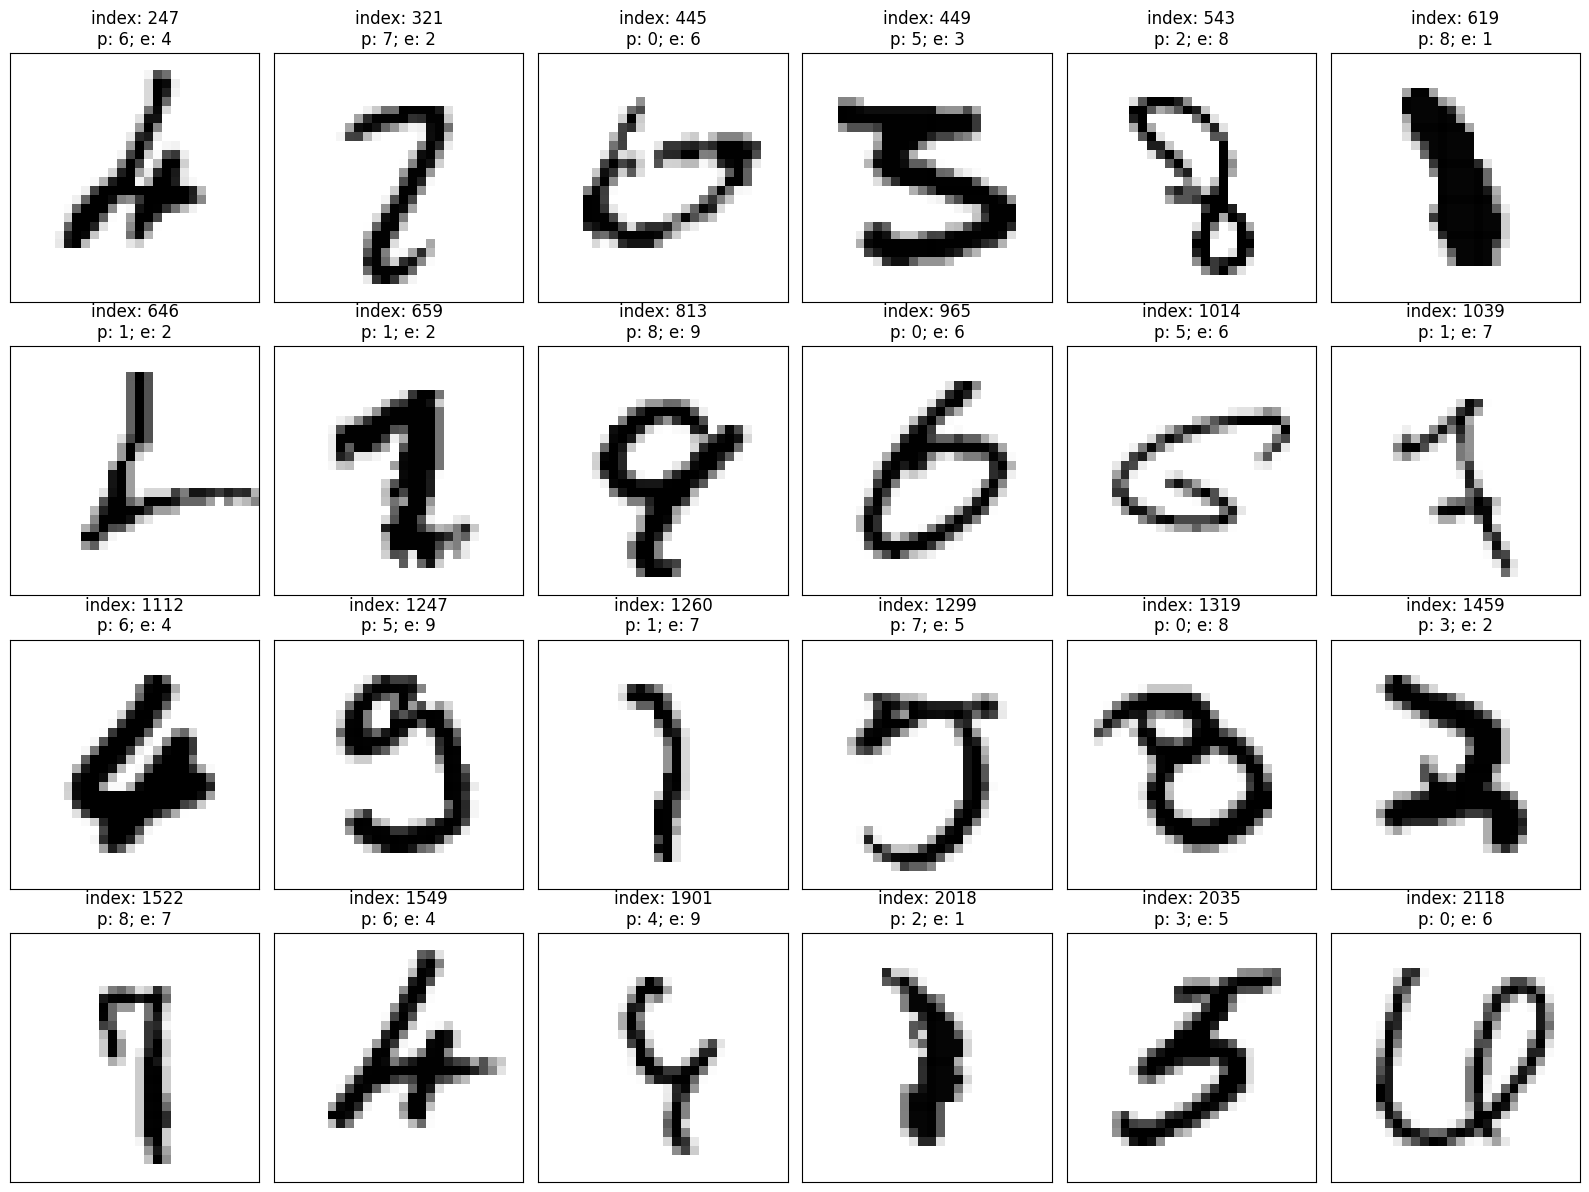

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define your convnet model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add a Dense layer with 4096 neurons
model.add(Dense(4096, activation='relu'))

# Add the existing Dense layers after the new Dense layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and evaluate its accuracy
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Evaluate model accuracy on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Locate and visualize incorrect predictions
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
predictions = model.predict(X_test)

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()
plt.show()
